In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Group of Seven populations Series.

In [10]:
g7_population = pd.Series([35.467, 63.951, 80.940, 60.665, 127.061, 64.511, 318.523])
# an ordered series of elements that uses a numpy array for the structure type
g7_population.name = 'G7 Population in millions'
type(g7_population.values)

numpy.ndarray

In [11]:
# However, you can change the index for the series
g7_population.index = [
    'Canada',
    'France',
    'Germany',
    'Italy',
    'Japan',
    'United Kingdom',
    'United States',
]
g7_population

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [12]:
# the series can be thought of as an ordered dictionary, and they can be created from a dictionary too
pd.Series({
    'Canada': 35.467,
    'France': 63.951,
    'Germany': 80.94,
    'Italy': 60.665,
    'Japan': 127.061,
    'United Kingdom': 64.511,
    'United States': 318.523
}, name='G7 Population in millions')

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [13]:
# you can still use numbers for the index if you use the iloc for the series.
g7_population.iloc[0]

35.467

In [14]:
g7_population['Canada']

35.467

In [15]:
g7_population.iloc[-1]

318.523

In [16]:
g7_population['United States']

318.523

In [17]:
g7_population['Canada': 'Italy']
# you can do a range like with python, except that the upper limit will be included with pandas

Canada     35.467
France     63.951
Germany    80.940
Italy      60.665
Name: G7 Population in millions, dtype: float64

In [18]:
g7_population > 70
# can do boolean series too just like the numpy arrays

Canada            False
France            False
Germany            True
Italy             False
Japan              True
United Kingdom    False
United States      True
Name: G7 Population in millions, dtype: bool

In [19]:
g7_population[g7_population > 70]
# example of actually printing out the series

Germany           80.940
Japan            127.061
United States    318.523
Name: G7 Population in millions, dtype: float64

In [20]:
g7_population[g7_population > g7_population.mean()]

Japan            127.061
United States    318.523
Name: G7 Population in millions, dtype: float64

The series supports vectorized options performed by numpy as the series is structurally formed by a numpy array

In [21]:
g7_population * 1_000_000

Canada             35467000.0
France             63951000.0
Germany            80940000.0
Italy              60665000.0
Japan             127061000.0
United Kingdom     64511000.0
United States     318523000.0
Name: G7 Population in millions, dtype: float64

In [22]:
g7_population.iloc[-1] = 500
g7_population

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     500.000
Name: G7 Population in millions, dtype: float64

In [23]:
g7_population[g7_population < 70] = 99.99
g7_population

Canada             99.990
France             99.990
Germany            80.940
Italy              99.990
Japan             127.061
United Kingdom     99.990
United States     500.000
Name: G7 Population in millions, dtype: float64

## Dataframes:  

You can create a dataframe by specifiying the columns, rows, and values however this can very easily become very very tedious.  
It is far more likely to create a dataframe using a csv or db file through pandas.

In [24]:
population_df = pd.DataFrame({
    'Population': [35.467, 63.951, 80.94 , 60.665, 127.061, 64.511, 318.523],
    'GDP': [
        1785387,
        2833687,
        3874437,
        2167744,
        4602367,
        2950039,
        17348075
    ],
    'Surface Area': [
        9984670,
        640679,
        357114,
        301336,
        377930,
        242495,
        9525067
    ],
    'HDI': [
        0.913,
        0.888,
        0.916,
        0.873,
        0.891,
        0.907,
        0.915
    ],
    'Continent': [
        'America',
        'Europe',
        'Europe',
        'Europe',
        'Asia',
        'Europe',
        'America'
    ]
}, columns=['Population', 'GDP', 'Surface Area', 'HDI', 'Continent'])
# the columns assignment is optional but helps keep the order

In [25]:
population_df.index = [
    'Canada',
    'France',
    'Germany',
    'Italy',
    'Japan',
    'United Kingdom',
    'United States',
]
# can create the indexes to have values and not just numbers

In [26]:
population_df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [27]:
population_df.info()
# shows the info for the dataframe and can be helpful in finding null values

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Canada to United States
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Population    7 non-null      float64
 1   GDP           7 non-null      int64  
 2   Surface Area  7 non-null      int64  
 3   HDI           7 non-null      float64
 4   Continent     7 non-null      object 
dtypes: float64(2), int64(2), object(1)
memory usage: 336.0+ bytes


In [28]:
population_df.describe()
# similar to numpy 2 dimensional array

,Population,GDP,Surface Area,HDI
count,7.000000,7.000000e+00,7.000000e+00,7.000000
mean,107.302571,5.080248e+06,3.061327e+06,0.900429
std,97.249970,5.494020e+06,4.576187e+06,0.016592
min,35.467000,1.785387e+06,2.424950e+05,0.873000
25%,62.308000,2.500716e+06,3.292250e+05,0.889500
50%,64.511000,2.950039e+06,3.779300e+05,0.907000
75%,104.000500,4.238402e+06,5.082873e+06,0.914000
max,318.523000,1.734808e+07,9.984670e+06,0.916000


In [29]:
population_df.dtypes

Population      float64
GDP               int64
Surface Area      int64
HDI             float64
Continent        object
dtype: object

In [30]:
population_df.loc['Canada']
# selects a row with loc, can use iloc for an index

Population       35.467
GDP             1785387
Surface Area    9984670
HDI               0.913
Continent       America
Name: Canada, dtype: object

In [31]:
population_df['Population'].to_frame()
# selectes a column, and the to_frame function will cause it to look more like a dataframe

,Population
Canada,35.467
France,63.951
Germany,80.940
Italy,60.665
Japan,127.061
United Kingdom,64.511
United States,318.523


In [32]:
population_df[['Population', 'GDP']]

,Population,GDP
Canada,35.467,1785387
France,63.951,2833687
Germany,80.940,3874437
Italy,60.665,2167744
Japan,127.061,4602367
United Kingdom,64.511,2950039
United States,318.523,17348075


In [33]:
population_df[1:4]
# while you can slice the dataframe in this manner it can be confusing as the upper limit is not included.
# easier to use loc for row selections though especially with unique indexes
# and then iloc can be used if needing to just use numerical indexes, but the upper limit will be included so there is less confusion

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe


In [34]:
population_df.loc['France': 'Italy']


,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe


In [35]:
population_df.loc['France': 'Italy', ['Population', 'GDP']]

,Population,GDP
France,63.951,2833687
Germany,80.940,3874437
Italy,60.665,2167744


In [36]:
population_df.loc[population_df['Population'] > 70]
# can use a boolean selector just like with series and numpy arrays

,Population,GDP,Surface Area,HDI,Continent
Germany,80.940,3874437,357114,0.916,Europe
Japan,127.061,4602367,377930,0.891,Asia
United States,318.523,17348075,9525067,0.915,America


In [37]:
population_df.loc[population_df['Population'] > 70, ['Population', 'GDP']]


,Population,GDP
Germany,80.940,3874437
Japan,127.061,4602367
United States,318.523,17348075


In [38]:
population_df.drop('Canada')
# can use drop to exclude rows instead of asking for inclusion like before
# drop does not actually change the dataframe though, so the data is still there just not being displayed

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [39]:
population_df.drop(columns=['Population', 'HDI'])

,GDP,Surface Area,Continent
Canada,1785387,9984670,America
France,2833687,640679,Europe
Germany,3874437,357114,Europe
Italy,2167744,301336,Europe
Japan,4602367,377930,Asia
United Kingdom,2950039,242495,Europe
United States,17348075,9525067,America


In [40]:
population_crisis = pd.Series([-1_000_000, -0.3], index=['GDP', 'HDI'])
# you can do math on the dataframes using a series and it will go down the column

In [41]:
population_df[['GDP', 'HDI']]

,GDP,HDI
Canada,1785387,0.913
France,2833687,0.888
Germany,3874437,0.916
Italy,2167744,0.873
Japan,4602367,0.891
United Kingdom,2950039,0.907
United States,17348075,0.915


In [42]:
population_df[['GDP', 'HDI']] + population_crisis

,GDP,HDI
Canada,785387.0,0.613
France,1833687.0,0.588
Germany,2874437.0,0.616
Italy,1167744.0,0.573
Japan,3602367.0,0.591
United Kingdom,1950039.0,0.607
United States,16348075.0,0.615


In [43]:
langs = pd.Series(
    ['French', 'German', 'Italian', 'English'],
    index=['France', 'Germany', 'Italy', 'United States'],
    name='Language'
)
# creating a series to add into the dataframe

In [44]:
population_df['Language'] = langs
population_df
# creates NaN values for areas without data from the series.

,Population,GDP,Surface Area,HDI,Continent,Language
Canada,35.467,1785387,9984670,0.913,America,NaN
France,63.951,2833687,640679,0.888,Europe,French
Germany,80.940,3874437,357114,0.916,Europe,German
Italy,60.665,2167744,301336,0.873,Europe,Italian
Japan,127.061,4602367,377930,0.891,Asia,NaN
United Kingdom,64.511,2950039,242495,0.907,Europe,NaN
United States,318.523,17348075,9525067,0.915,America,English


In [45]:
population_df.rename(
    columns={
        'HDI': 'Human Development Index'
    }, index={
        'United States': 'USA',
        'United Kingdom': 'UK'
    })
# renaming the columns and indexes for the dataframe, any extras that do not exist will cause no changes
# these changes are only for this display, unless you set the dataframe equal to it

,Population,GDP,Surface Area,Human Development Index,Continent,Language
Canada,35.467,1785387,9984670,0.913,America,NaN
France,63.951,2833687,640679,0.888,Europe,French
Germany,80.940,3874437,357114,0.916,Europe,German
Italy,60.665,2167744,301336,0.873,Europe,Italian
Japan,127.061,4602367,377930,0.891,Asia,NaN
UK,64.511,2950039,242495,0.907,Europe,NaN
USA,318.523,17348075,9525067,0.915,America,English


In [46]:
population_df

,Population,GDP,Surface Area,HDI,Continent,Language
Canada,35.467,1785387,9984670,0.913,America,NaN
France,63.951,2833687,640679,0.888,Europe,French
Germany,80.940,3874437,357114,0.916,Europe,German
Italy,60.665,2167744,301336,0.873,Europe,Italian
Japan,127.061,4602367,377930,0.891,Asia,NaN
United Kingdom,64.511,2950039,242495,0.907,Europe,NaN
United States,318.523,17348075,9525067,0.915,America,English


In [47]:
population_df.loc['China'] = pd.Series({'Population': 1_400_000_000, 'Continent': 'Asia', 'GDP': 5})
# to actually create a new row you need to set the dataframe row equal to the Series, as the .append function will create a temporary one
# or you can set it equal when you use the .append function

In [48]:
population_df

,Population,GDP,Surface Area,HDI,Continent,Language
Canada,3.546700e+01,1785387,9984670.0,0.913,America,NaN
France,6.395100e+01,2833687,640679.0,0.888,Europe,French
Germany,8.094000e+01,3874437,357114.0,0.916,Europe,German
Italy,6.066500e+01,2167744,301336.0,0.873,Europe,Italian
Japan,1.270610e+02,4602367,377930.0,0.891,Asia,NaN
United Kingdom,6.451100e+01,2950039,242495.0,0.907,Europe,NaN
United States,3.185230e+02,17348075,9525067.0,0.915,America,English
China,1.400000e+09,5,NaN,NaN,Asia,NaN


In [49]:
population_df['GDP Per Capita'] = population_df['GDP'] / population_df['Population']
# can use the data in the columns to be able to create another column
population_df

,Population,GDP,Surface Area,HDI,Continent,Language,GDP Per Capita
Canada,3.546700e+01,1785387,9984670.0,0.913,America,NaN,5.033939e+04
France,6.395100e+01,2833687,640679.0,0.888,Europe,French,4.431028e+04
Germany,8.094000e+01,3874437,357114.0,0.916,Europe,German,4.786801e+04
Italy,6.066500e+01,2167744,301336.0,0.873,Europe,Italian,3.573303e+04
Japan,1.270610e+02,4602367,377930.0,0.891,Asia,NaN,3.622171e+04
United Kingdom,6.451100e+01,2950039,242495.0,0.907,Europe,NaN,4.572924e+04
United States,3.185230e+02,17348075,9525067.0,0.915,America,English,5.446412e+04
China,1.400000e+09,5,NaN,NaN,Asia,NaN,3.571429e-09


## Reading External Data:

In [50]:
pd.read_csv?
# large amount of parameters and flexibility, refer to documentation as needed!

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols=None,
    squeeze: 'bool | None' = None,
    prefix: 'str | lib.NoDefault' = <no_default>,
    mangle_dupe_cols: 'bool' = True,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace: 'bool' = False,
    skiprows=None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values=None,
    keep_default_na: 'bool' = True,
    na_filter: 'bool' = True,
    verbose: 'bool' = False,
    skip_blank_lines: 'bool' = True,
    parse_dates=None,
    infer_dateti

In [51]:
df = pd.read_csv('data/btc-market-price.csv', header=None)
# not this csv file does not have a header for the names of the columns so we need to put header=None
# this will make it so it does not take the first row of data into column names
df.head()
# see how the top is just 0 1

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [52]:
df.columns=['Timestamp', 'Price']
# this will allow us to name the columns instead of just having the 0 and 1 index
df.head()

,Timestamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [53]:
df.dtypes
# notice that the timestamp column was not read in as a date object.

Timestamp     object
Price        float64
dtype: object

In [54]:
df['Timestamp'] = pd.to_datetime(df['Timestamp']).head()
# this will help us clean the data up to change it from an object into a datetime object
# we need to set the Timestamp column from the dataframe equal to this change to actually change our dataframe.
df.dtypes

Timestamp    datetime64[ns]
Price               float64
dtype: object

In [55]:
df.set_index('Timestamp', inplace=True)
# since the timestamp is basically an index we can make our dataframe even more usable by setting the timestamp to be the index
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


#### Everything done so far:  

    df = pd.read_csv('data/btc-market-price.csv', header=None)  
    df.columns = ['Timestamp', 'Price']  
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])  
    df.set_index('Timestamp', inplace=True)  


This is everything that we did to clean up this dataset from this csv. This can acually be added into our read csv command to be able to execute all of this at once, so if we ever parse a csv file with the same structure, like in a weekly report, then we know how we need to clean the csv.

In [56]:
btc_df = pd.read_csv(
    'data/btc-market-price.csv',
    header=None,
    names=['Timestamp', 'Price'],
    index_col=0,
    parse_dates=True
)

btc_df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


<AxesSubplot: xlabel='Timestamp'>

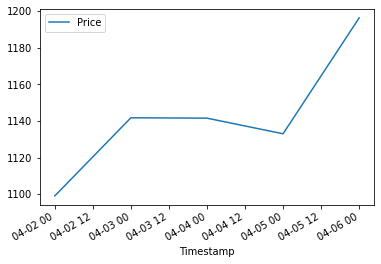

In [57]:
df.plot()
# uses matplotlib to create a line graph for the pandas dataframe

<AxesSubplot: xlabel='Timestamp'>

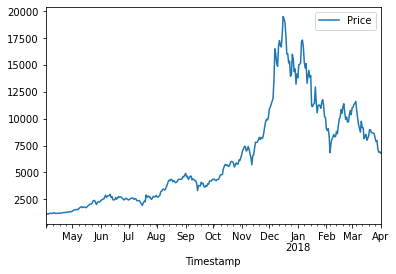

In [58]:
btc_df.plot()

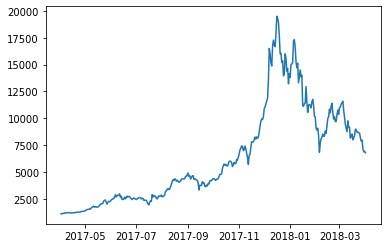

In [59]:
plt.plot(btc_df.index, btc_df['Price'])
# example of using matplotlib directly to plot the chart

In [60]:
eth_df = pd.read_csv('data/eth-price.csv')
eth_df
# This csv is not structure the same way as the previous one, however it still holds similar data and we want to compare it.
# Some differences are that this csv has a header, and this one contains an extra field for UnixTimeStamp
# to accomplish this we need to clean up the data. 

,Date(UTC),UnixTimeStamp,Value
0,4/2/2017,1491091200,48.55
1,4/3/2017,1491177600,44.13
2,4/4/2017,1491264000,44.43
3,4/5/2017,1491350400,44.90
4,4/6/2017,1491436800,43.23
...,...,...,...
357,3/28/2018,1522195200,445.93
358,3/29/2018,1522281600,383.90
359,3/30/2018,1522368000,393.82
360,3/31/2018,1522454400,394.07


In [61]:
eth_df.dtypes
# Futhermore, we can see that the Date column was parsed in as an object and not a datetime object

Date(UTC)         object
UnixTimeStamp      int64
Value            float64
dtype: object

In [62]:
# The Unix time stamps are too precise to be able to use as an index and be able to compare to the previous dataset, so we must use the Date(UTC)
# To do this we can do a similar action to the first read in with parse_dates and the index_col=0. 
eth_df = pd.read_csv(
    'data/eth-price.csv',
    parse_dates=True,
    index_col=0
)
print(eth_df.info())

eth_df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 362 entries, 2017-04-02 to 2018-04-01
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UnixTimeStamp  362 non-null    int64  
 1   Value          362 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.5 KB
None


,UnixTimeStamp,Value
Date(UTC),,
2017-04-02,1491091200,48.55
2017-04-03,1491177600,44.13
2017-04-04,1491264000,44.43
2017-04-05,1491350400,44.90
2017-04-06,1491436800,43.23
...,...,...
2018-03-28,1522195200,445.93
2018-03-29,1522281600,383.90
2018-03-30,1522368000,393.82


### Combining: 

We can now combine these 2 into 1 dataframe to be able to compare the data between the 2

In [63]:
# use the index of one of them to set up the dataframe, as they both share indexes
compare_prices = pd.DataFrame(index=btc_df.index)
# create new columns using the price info from each dataframse
compare_prices['Bitcoin'] = btc_df['Price']
compare_prices['Ether'] = eth_df['Value']

compare_prices.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


<AxesSubplot: xlabel='Timestamp'>

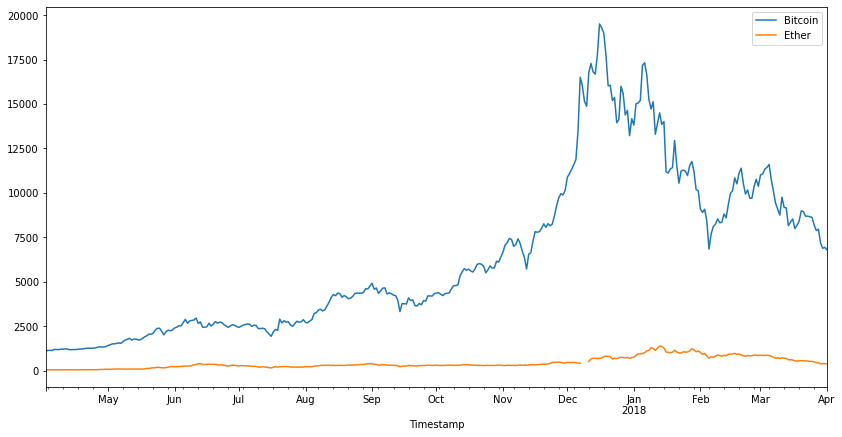

In [65]:
compare_prices.plot(figsize=(14, 7))
# notice on this graph that there is a gap for the eth_df right after December

<AxesSubplot: xlabel='Timestamp'>

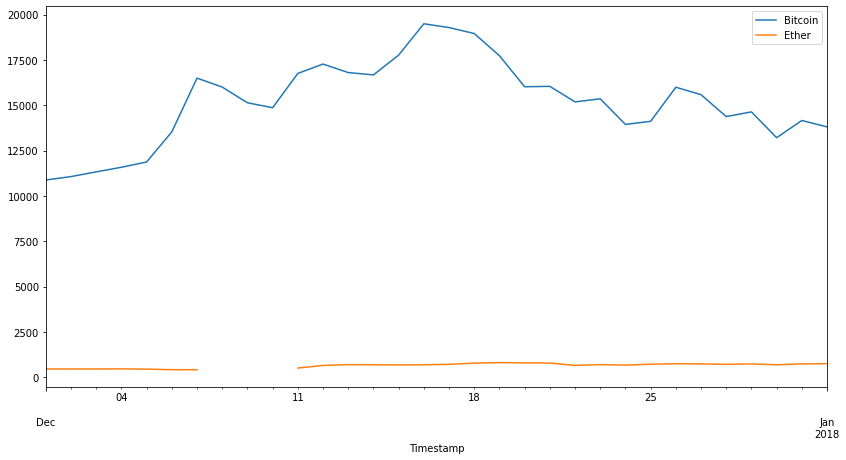

In [67]:
# This is letting us create a graph that is just focused on this gap in our data
# lets us slice the location between december 1st and january 1st
compare_prices.loc['2017-12-01':'2018-01-01'].plot(figsize=(14, 7))


We have missing data from this dataframe, and this will be explored in future work for cleaning data.